#KNN

In [1]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))
class KNN:
  def __init__(self, k):
    self.k = k
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  def predict(self, X):
    prediction = [self._predict(x) for x in X]
    return prediction
  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

#Testing KNN

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1234
)

k = 5
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))
print(y_test,np.array(predictions),sep="\n")

KNN classification accuracy 0.9666666666666667
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
[1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


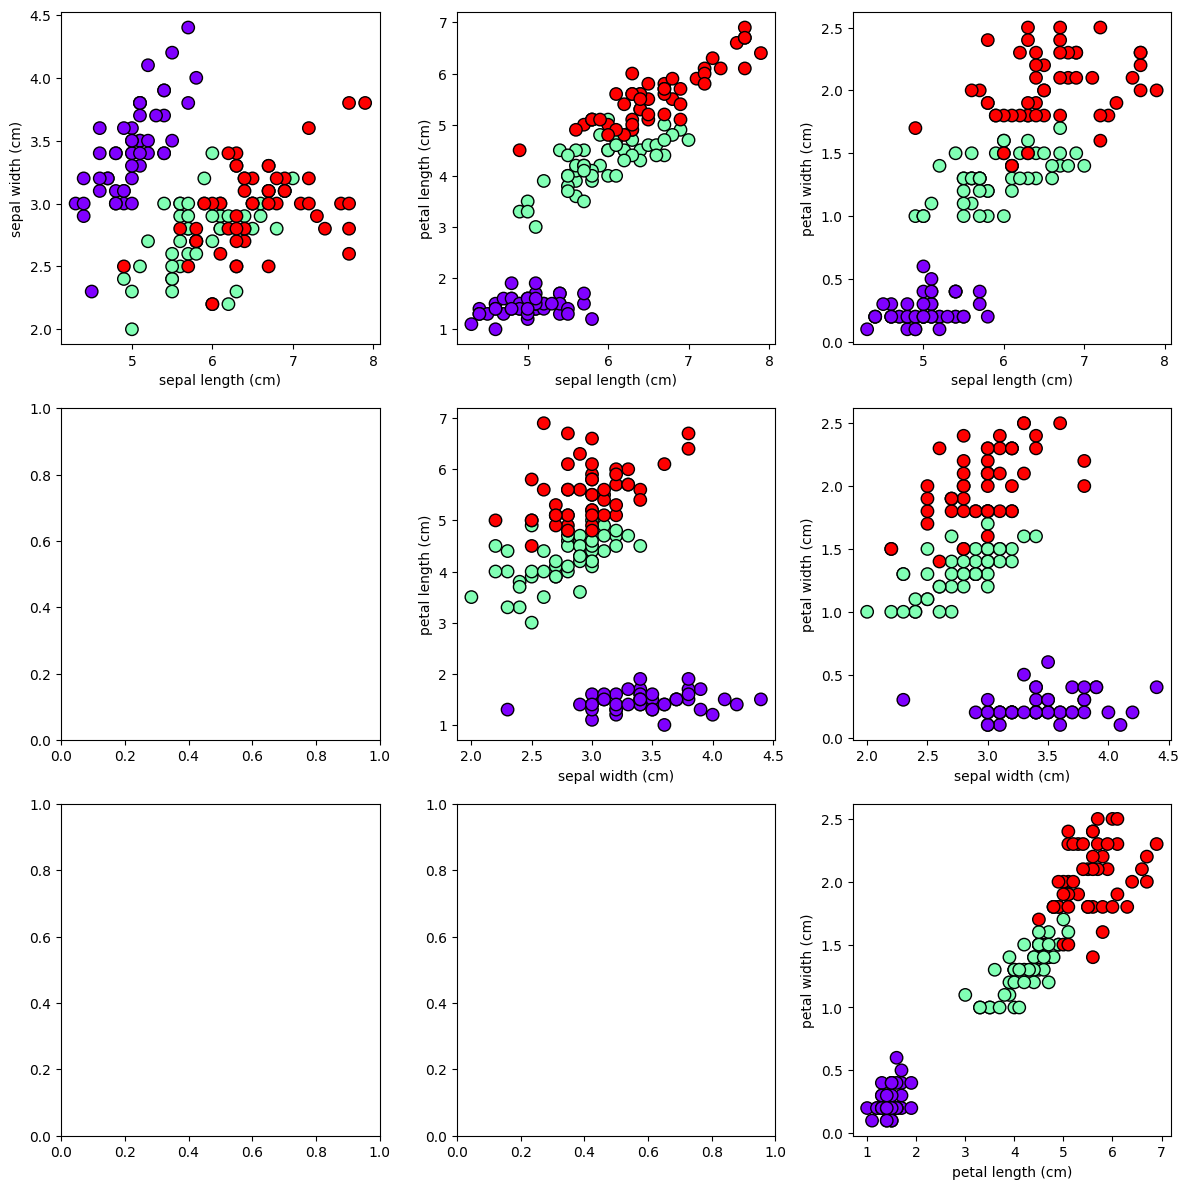

In [3]:
n_features = X.shape[1]

fig, axes = plt.subplots(n_features-1, n_features-1, figsize=(12, 12))

for i in range(n_features):
    for j in range(i+1, n_features):
        ax = axes[i, j-1] if i < j else axes[j, i-1]

        scatter = ax.scatter(X[:, i], X[:, j], c=y, cmap='rainbow', edgecolor='k', s=80)

        # Add labels to the scatter plot
        ax.set_xlabel(iris.feature_names[i])
        ax.set_ylabel(iris.feature_names[j])



# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#Visualizing Accuracy with k

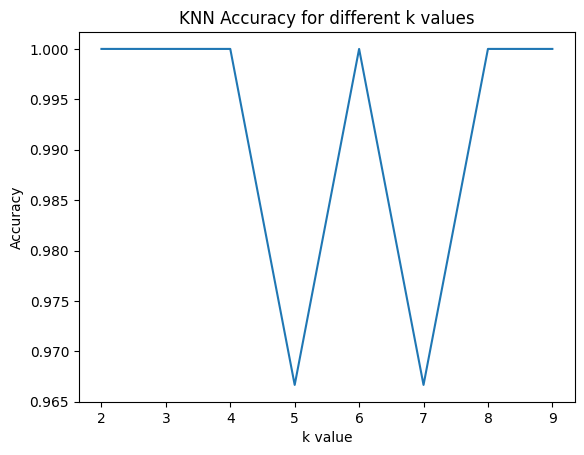

In [4]:
accuracies=[]
for i in range(2,10):
    k = i
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracies.append(accuracy(y_test, predictions))

plt.plot(range(2, 10), accuracies)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.show()